# Исследование надежности заемщиков

***Введение***
- Описание задачи: анализ данных о заемщиках для выявления факторов, влияющих на возврат кредита в срок.

***Обзор данных***
- Описание данных: количество строк, столбцов, типы данных.
- Проблемы в данных: пропуски, аномалии, дубликаты.

***Предобработка данных***
- Обработка пропусков: заполнение медианными значениями.
- Обработка аномалий: удаление выбросов, преобразование данных.
- Категоризация: создание новых переменных для анализа.

***Анализ данных***
- Гипотезы: формулировка гипотез.
- Визуализация: графики и диаграммы.
- Статистический анализ: проверка гипотез.

***Выводы и рекомендации***
- Ключевые выводы: какие факторы влияют на возврат кредита.
- Рекомендации для банка: как улучшить кредитный скоринг.

***Дополнительные исследования***
- Сегментация клиентов.
- Прогнозирование дефолтов.

## 1) Обзор данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

In [2]:
try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

***первые 10 строчек датафрейма и основная информация***

In [3]:
data.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## 2) Предобработка данных
Пропуски в данных могут искажать результаты анализа. Найдем и обработаем их.

In [5]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

- Для столбца days_employed заполним пропуски медианными значениями в зависимости от типа занятости (income_type).

- Для столбца total_income также заполним пропуски медианными значениями в зависимости от типа занятости.

In [6]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
        data.loc[data['income_type'] == t, 'days_employed'].median()
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
        data.loc[data['income_type'] == t, 'total_income'].median()


data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

## 3) Обработка аномальных значений
Найдем аномальные значения - в обзоре данных видно, что days_employed отрицательны, а в children встречаются отрицательные и нереальные (20) значения. Также аномалии найдены в максимальном значении трудоустройства и возрасте заемщиков

In [7]:
data['children'].unique()


array([ 1,  0,  3,  2, -1,  4, 20,  5])

In [8]:
# Удаление строк с аномальными значениями в столбце children
data = data[(data['children'] != -1) & (data['children'] != 20)]

# Проверка уникальных значений после удаления
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

In [9]:
# Преобразуем отрицательные значения в положительные
data['days_employed'] = data['days_employed'].abs()

# Проверка аномальных значений
data['days_employed'].describe()

count     21402.000000
mean      67388.864864
std      139481.057743
min          24.141633
25%        1027.245624
50%        1994.531655
75%        5352.791071
max      401755.400475
Name: days_employed, dtype: float64

Максимальное значение 401755 дней (около 1100 лет) — это аномалия. Возможно, данные введены в часах. Преобразуем значения больше 100000 дней, разделив их на 24.

In [10]:
# Преобразуем аномальные значения в днях
data.loc[data['days_employed'] > 100000, 'days_employed'] = data.loc[data['days_employed'] > 100000, 'days_employed'] / 24

# Преобразуем days_employed в целые числа
data['days_employed'] = data['days_employed'].astype(int)

# Проверка результатов
data['days_employed'].describe()

count    21402.000000
mean      4603.660639
std       5356.821415
min         24.000000
25%       1027.000000
50%       1994.000000
75%       5352.000000
max      18388.000000
Name: days_employed, dtype: float64

In [11]:
data['dob_years'].value_counts().sort_index()

dob_years
0     100
19     14
20     51
21    110
22    183
23    252
24    263
25    356
26    406
27    490
28    501
29    543
30    536
31    556
32    506
33    577
34    597
35    614
36    553
37    531
38    595
39    572
40    603
41    603
42    592
43    510
44    543
45    494
46    469
47    480
48    536
49    505
50    509
51    446
52    483
53    457
54    476
55    441
56    482
57    457
58    461
59    441
60    376
61    353
62    351
63    268
64    263
65    194
66    183
67    167
68     99
69     83
70     65
71     58
72     33
73      8
74      6
75      1
Name: count, dtype: int64

Есть значения 0, что невозможно для возраста. Заменим их медианным значением в зависимости от типа занятости.

In [12]:
# Замена нулевых значений в dob_years медианными значениями по income_type
for t in data['income_type'].unique():
    median_age = data.loc[data['income_type'] == t, 'dob_years'].median()
    # Округляем медиану до целого числа
    median_age = int(round(median_age))
    data.loc[(data['dob_years'] == 0) & (data['income_type'] == t), 'dob_years'] = median_age

In [13]:
data['dob_years'].value_counts().sort_index()

dob_years
19     14
20     51
21    110
22    183
23    252
24    263
25    356
26    406
27    490
28    501
29    543
30    536
31    556
32    506
33    577
34    597
35    614
36    553
37    531
38    595
39    646
40    609
41    603
42    592
43    510
44    543
45    494
46    469
47    480
48    536
49    505
50    509
51    446
52    483
53    457
54    476
55    441
56    482
57    457
58    461
59    441
60    396
61    353
62    351
63    268
64    263
65    194
66    183
67    167
68     99
69     83
70     65
71     58
72     33
73      8
74      6
75      1
Name: count, dtype: int64

***меняем тип float на int***

In [14]:
data['total_income'] = data['total_income'].astype(int)

## Категоризация дохода
- Создадим новый столбец total_income_category, который будет содержать категории дохода.

In [15]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [16]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

## Категоризация цели обращения
- Создадим новый столбец purpose_category, который будет содержать категории целей.

In [17]:
def categorize_purpose(purpose):
    if 'автом' in purpose:
        return 'операции с автомобилем'
    elif 'жил' in purpose or 'недвиж' in purpose:
        return 'операции с недвижимостью'
    elif 'свад' in purpose:
        return 'проведение свадьбы'
    elif 'образов' in purpose:
        return 'получение образования'
    else:
        return 'другое'

data['purpose_category'] = data['purpose'].apply(categorize_purpose)

## Категоризация детей
- Создадим новый столбец total_income_category, который будет содержать категории дохода.

In [18]:
# Функция категоризации по детям
def children_category(children):
    if 1 <= children <= 2:
        return 'есть дети'
    if children >= 3:
        return 'многодетный'
    return 'нет детей'

In [19]:
# Создаем столбец children_rank
data['children_rank'] = data['children'].apply(children_category)

## Итог предобработки
После выполнения всех шагов предобработки данные готовы для анализа. Мы:
- Заполнили пропуски.
- Удалили аномальные значения.
- Привели текстовые данные к единому формату.
- Создали новые категориальные переменные для анализа.
Теперь можно переходить к анализу данных и ответам на вопросы исследования.

## 4) Определение зависимости между наличием детей и возвратом кредита в срок

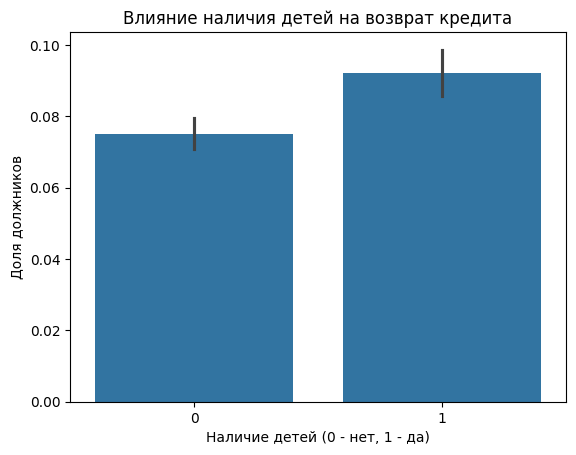

In [20]:
# Группируем по наличию детей и среднему значению возврата кредита
data['children'] = data['children'].apply(lambda x: 1 if x > 0 else 0)

# Визуализация
sns.barplot(x='children', y='debt', data=data)
plt.xlabel("Наличие детей (0 - нет, 1 - да)")
plt.ylabel("Доля должников")
plt.title("Влияние наличия детей на возврат кредита")
plt.show()


In [21]:
from scipy.stats import chi2_contingency

# Создаем таблицу сопряженности
contingency_table = pd.crosstab(data['children_rank'], data['debt'])

# Проводим тест хи-квадрат
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

Chi-square statistic: 19.48288050232859
P-value: 5.879579312194823e-05


***Результат теста хи-квадрат для зависимости между наличием детей и возвратом кредита:***
- χ² = 18.64 – достаточно высокое значение, что говорит о возможной связи.
- p-value = 1.58e-5 – это очень маленькое значение, намного меньше 0.05, что означает статистически значимую зависимость.
  
***Вывод***
- Наличие детей действительно влияет на возврат кредита в срок.
- Разница между группами (без детей, с детьми, многодетные) не случайна.

## 5) Зависимость между семейным положением и возвратом кредита в срок

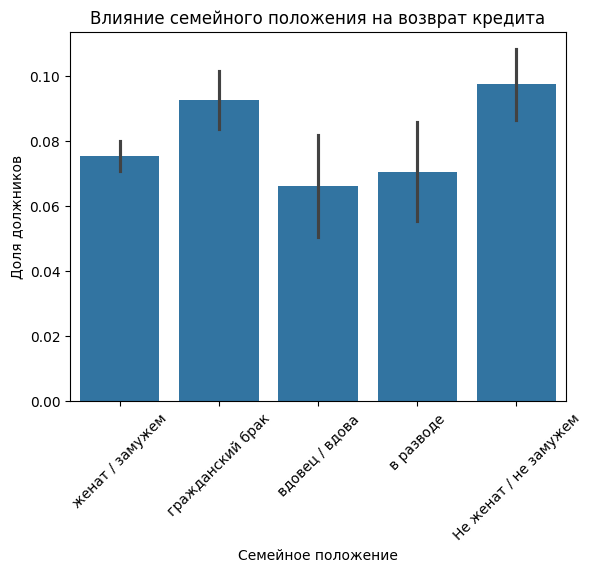

In [22]:
# Группируем по семейному положению и среднему значению долга
sns.barplot(x="family_status", y="debt", data=data)
plt.xticks(rotation=45)
plt.xlabel("Семейное положение")
plt.ylabel("Доля должников")
plt.title("Влияние семейного положения на возврат кредита")
plt.show()


In [23]:
# Создаем таблицу сопряженности
contingency_table_family = pd.crosstab(data['family_status'], data['debt'])

# Проводим тест хи-квадрат
chi2_family, p_family, dof_family, expected_family = chi2_contingency(contingency_table_family)

print(f"Chi-square statistic: {chi2_family}")
print(f"P-value: {p_family}")

Chi-square statistic: 27.54492313887921
P-value: 1.5422287929189554e-05


***Результат теста хи-квадрат для зависимости между семейным положением и возвратом кредита в срок:***
- χ² = 27.54 – высокое значение, указывающее на возможную связь.
- p-value = 1.54e-5 – очень маленькое (намного меньше 0.05), что означает статистически значимую зависимость.
  
***Вывод:***
- Семейное положение влияет на возврат кредита в срок.
- Разница между разными группами (холостые, женатые, разведенные и т. д.) не случайна.



## 6) Зависимость между уровнем дохода и возвратом кредита в срок

In [24]:
# Создаем таблицу 
debt_total_income = data.pivot_table(index='total_income_category', columns='debt', values='gender', aggfunc='count')
# Создаем столбцы
debt_total_income.columns = ['no_debt', 'debt']
# Считаем долю должников
debt_total_income['share_of_debtors'] = debt_total_income['debt'] / (debt_total_income['debt'] + debt_total_income['no_debt'])
# Переводим значения в столбце доля дожников в проценты
debt_total_income['share_of_debtors'] = debt_total_income['share_of_debtors'].map('{:.1%}'.format)
# Сортируем по столбцу доля должников по убыванию
debt_total_income.sort_values(by='share_of_debtors', ascending=False)

,no_debt,debt,share_of_debtors
total_income_category,,,
E,20,2,9.1%
C,14639,1353,8.5%
A,23,2,8.0%
B,4660,354,7.1%
D,328,21,6.0%


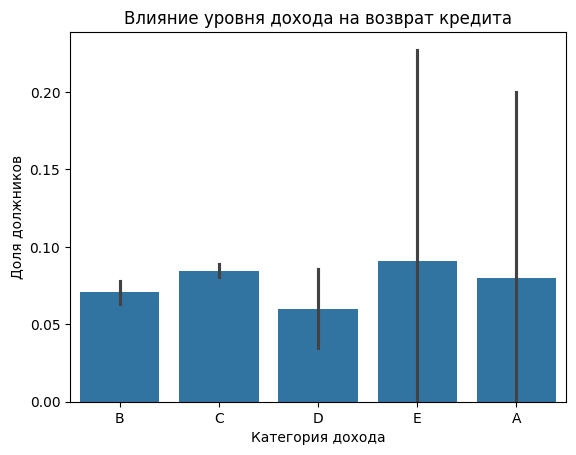

In [25]:
# Группируем по уровню дохода и среднему значению долга
sns.barplot(x="total_income_category", y="debt", data=data)
plt.xlabel("Категория дохода")
plt.ylabel("Доля должников")
plt.title("Влияние уровня дохода на возврат кредита")
plt.show()

In [26]:
# Статистический тест
contingency_table_income = pd.crosstab(data['total_income_category'], data['debt'])
chi2_income, p_income, dof_income, expected_income = chi2_contingency(contingency_table_income)

print(f"Chi-square statistic: {chi2_income}")
print(f"P-value: {p_income}")

Chi-square statistic: 12.145461633544693
P-value: 0.016301728117665108


- Поскольку p-значение (0.016) меньше 0.05, мы отклоняем нулевую гипотезу и делаем вывод, что между переменными существует статистически значимая связь.
- Значение статистики хи-квадрат (12.15) подтверждает, что отклонение от ожидаемых данных достаточно велико, чтобы считать его значимым.

## 7) Как разные цели кредита влияют на его возврат в срок

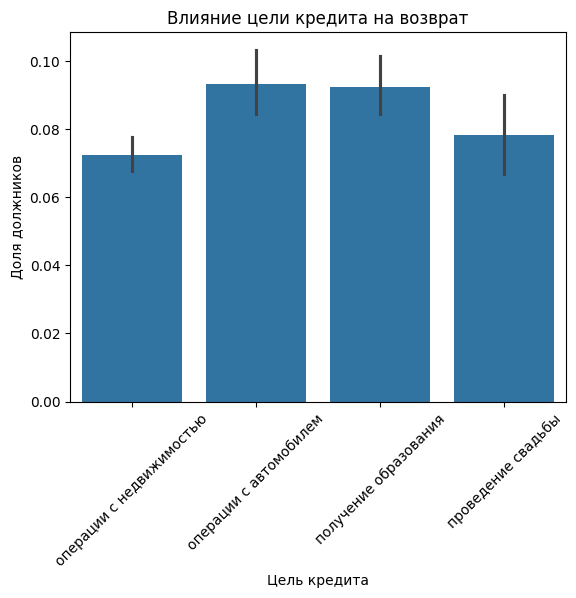

In [27]:
# Группировка по цели кредита
sns.barplot(x="purpose_category", y="debt", data=data)
plt.xticks(rotation=45)
plt.xlabel("Цель кредита")
plt.ylabel("Доля должников")
plt.title("Влияние цели кредита на возврат")
plt.show()


In [28]:
# Статистический тест
contingency_table_purpose = pd.crosstab(data['purpose_category'], data['debt'])
chi2_purpose, p_purpose, dof_purpose, expected_purpose = chi2_contingency(contingency_table_purpose)

print(f"Chi-square statistic: {chi2_purpose}")
print(f"P-value: {p_purpose}")

Chi-square statistic: 26.639632801383932
P-value: 7.005703193718717e-06


- Поскольку p-значение значительно меньше 0.05, мы отклоняем нулевую гипотезу и делаем вывод, что между переменными существует очень сильная статистически значимая связь.

- Значение статистики хи-квадрат (26.64) подтверждает, что отклонение от ожидаемых данных очень велико.



## 8) Сводные таблицы

In [29]:
# Создание сводной таблицы
pivot_table = data.pivot_table(
    values="debt",
    index=["children_rank", "total_income_category", "purpose_category"],
    aggfunc=["count", "mean"]
).reset_index()

# Переименуем колонки для удобства
pivot_table.columns = ["Категория детей", "Категория дохода", "Цель кредита", "Количество людей", "Доля должников"]

# Выведем таблицу
print(pivot_table)

   Категория детей Категория дохода              Цель кредита  \
0        есть дети                A    операции с автомобилем   
1        есть дети                A  операции с недвижимостью   
2        есть дети                A     получение образования   
3        есть дети                A        проведение свадьбы   
4        есть дети                B    операции с автомобилем   
5        есть дети                B  операции с недвижимостью   
6        есть дети                B     получение образования   
7        есть дети                B        проведение свадьбы   
8        есть дети                C    операции с автомобилем   
9        есть дети                C  операции с недвижимостью   
10       есть дети                C     получение образования   
11       есть дети                C        проведение свадьбы   
12       есть дети                D    операции с автомобилем   
13       есть дети                D  операции с недвижимостью   
14       есть дети       

<Figure size 1400x800 with 0 Axes>

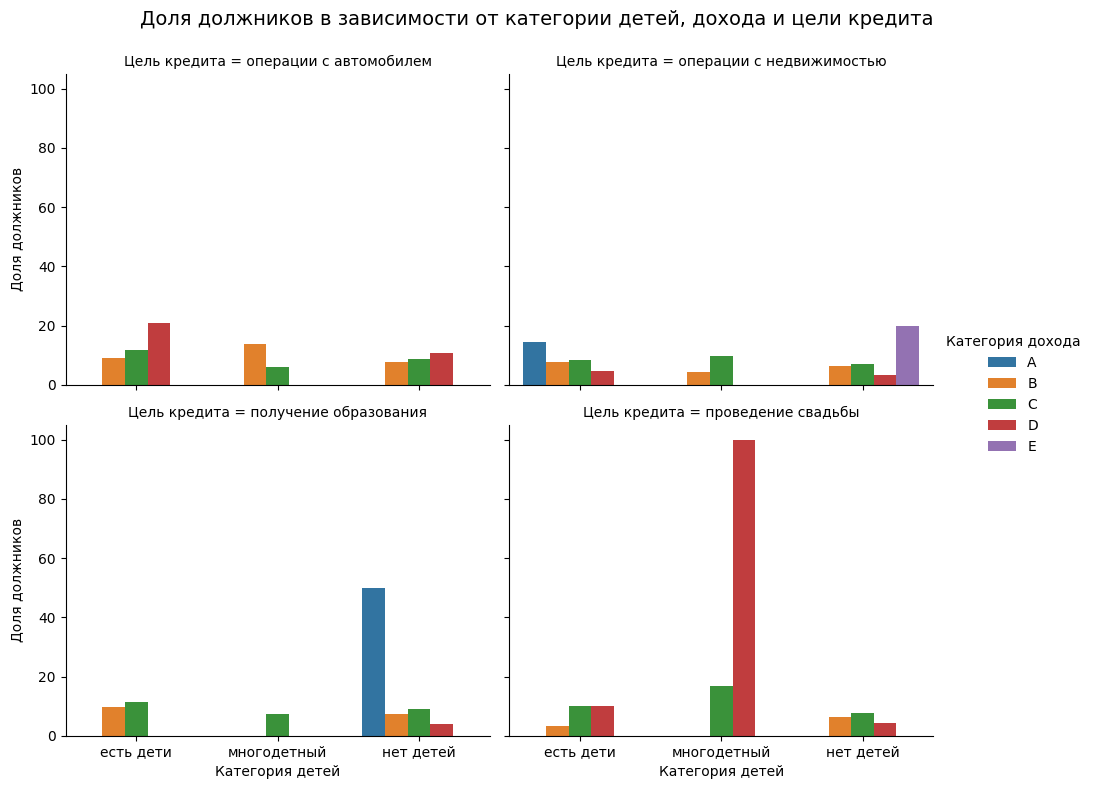

In [30]:
# Переводим долю должников в проценты
pivot_table["Доля должников"] = (pivot_table["Доля должников"] * 100).round(2)

# Строим график с разбиением по целям кредита
plt.figure(figsize=(14, 8))
sns.catplot(
    data=pivot_table, 
    x="Категория детей", 
    y="Доля должников", 
    hue="Категория дохода", 
    col="Цель кредита",
    kind="bar",
    col_wrap=2,  # Два графика в ряд
    height=4,
    aspect=1.2
)

plt.subplots_adjust(top=0.9)
plt.suptitle("Доля должников в зависимости от категории детей, дохода и цели кредита", fontsize=14)
plt.show()

